In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# scikit-learn
import sklearn

# ÏàòÏπòÌòï Î≥ÄÌôò
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# PCA (Ï∞®Ïõê Ï∂ïÏÜå : Ï£ºÏÑ±Î∂ÑÎ∂ÑÏÑù)
from sklearn.decomposition import PCA

# Î¨∏Ï†úÏßÄ, ÎãµÏïàÏßÄ Î∂ÑÎ¶¨
from sklearn.model_selection import train_test_split

# Î∂ÑÎ•ò Î™®Îç∏
from sklearn.linear_model import LogisticRegression # Î∂ÑÎ•ò Î™®Îç∏ (ÌöåÍ∑Ä Î™®Îç∏ ÏïÑÎãò)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # Tree : ÎÇòÎ¨¥
from sklearn.ensemble import RandomForestClassifier # Forest : ÎÇòÎ¨¥Í∞Ä Î™®Ïó¨ÏÑú Ïà≤Ïù¥ Îê®

# Ï†ïÍ∑úÌôî / Ïä§ÏºÄÏùºÎü¨
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV

# Î∂ÑÎ•ò ÌèâÍ∞Ä Îß§Ìä∏Î¶≠Ïä§
from sklearn.metrics import accuracy_score

# --- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä ÏûÑÌè¨Ìä∏ ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

# matplotlib Ï∞®Ìä∏ Ïä§ÌÉÄÏùºÏùÑ seaborn Ïä§ÌÉÄÏùºÎ°ú ÏÑ§Ï†ï
sns.set()

# ----------- Ï∞®Ìä∏ Í¥ÄÎ†® ÏÜçÏÑ± (ÌïúÍ∏ÄÏ≤òÎ¶¨, Í∑∏Î¶¨Îìú) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- Ï£ºÌîºÌÑ∞ , Ï∂úÎ†•Í≤∞Í≥º ÎÑìÏù¥ ÎäòÎ¶¨Í∏∞ ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load (df)

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

id  bone_length  rotting_flesh  hair_length  has_soul  color    type
0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin
2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost

# EDA

| Ïª¨ÎüºÎ™Ö | ÏÑ§Î™Ö |
|--------|------|
| <font color=yellow>---</font> | <font color=yellow>Í∏∞Î≥∏ ÌîºÏ≥ê</font> |
| **bone_length** | ÎºàÏùò Í∏∏Ïù¥Î•º ÎÇòÌÉÄÎÇ¥Îäî ÏàòÏπòÏûÖÎãàÎã§. Ïù¥ Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÎºàÍ∞Ä Í∏∏Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. |
| **rotting_flesh** | ÏÇ¥Ïù¥ Ïç©Îäî Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏàòÏπòÏûÖÎãàÎã§. Ïù¥ Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Î∂ÄÌå®Í∞Ä Ïã¨ÌïòÎã§Îäî ÎúªÏûÖÎãàÎã§. |
| **hair_length** | Î®∏Î¶¨Ïπ¥ÎùΩ ÎòêÎäî ÌÑ∏Ïùò Í∏∏Ïù¥Î•º ÎÇòÌÉÄÎÇ¥Îäî ÏàòÏπòÏûÖÎãàÎã§. Ïù¥ Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌÑ∏Ïù¥ Í∏∏Îã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§. |
| **has_soul** | ÏòÅÌòºÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäî Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏàòÏπòÏûÖÎãàÎã§. Ïù¥ Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÏòÅÌòºÏù¥ Îçî Ïò®Ï†ÑÌïòÍ±∞ÎÇò Í∞ïÌïòÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. |
| **color** | Î™¨Ïä§ÌÑ∞Ïùò Ï£ºÎêú ÏÉâÍπîÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. Ïòà: `white`, `black`, `clear`, `blood` |
| **type** | ÏòàÏ∏°Ìï¥Ïïº Ìï† Î™©Ìëú(**Target**) Î≥ÄÏàòÏûÖÎãàÎã§. Ïù¥ Î™¨Ïä§ÌÑ∞Í∞Ä **Íµ¨Ïö∏(Ghoul)**, **Í≥†Î∏îÎ¶∞(Goblin)**, **Ïú†Î†π(Ghost)** Ï§ë Ïñ¥Îñ§ Ï¢ÖÎ•òÏù∏ÏßÄÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§. |
| <font color=yellow>---</font> | <font color=yellow>ÌååÏÉù ÌîºÏ≥ê</font> |
| **bl_rf_ratio** | **Îºà Í∏∏Ïù¥ ÎåÄÎπÑ Ïç©ÏùÄ ÏÇ¥Ï†ê** ‚Äî Îºà Í∏∏Ïù¥Ïóê ÎπÑÌï¥ ÏÇ¥Ï†êÏù¥ ÏñºÎßàÎÇò Ïç©ÏóàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëúÏûÖÎãàÎã§. |
| **bl_hl_ratio** | **Îºà Í∏∏Ïù¥ ÎåÄÎπÑ ÌÑ∏ Í∏∏Ïù¥** ‚Äî Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌÅ¨Í∏∞Ïóê ÎπÑÌï¥ ÌÑ∏Ïù¥ ÏñºÎßàÎÇò Í∏¥ÏßÄÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§. |
| **rf_hl_ratio** | **Ïç©ÏùÄ ÏÇ¥Ï†ê ÎåÄÎπÑ ÌÑ∏ Í∏∏Ïù¥** ‚Äî Î∂ÄÌå® Ï†ïÎèÑÏôÄ ÌÑ∏ Í∏∏Ïù¥ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌï©ÎãàÎã§. |
| **humanoid_index** | **Ïù∏Í∞ÑÌòï ÏßÄÏàò** ‚Äî `bl √ó hs` Î°ú Í≥ÑÏÇ∞ÎêòÎ©∞, ÎºàÎåÄÍ∞Ä Í∏∏Í≥† ÏòÅÌòºÏù¥ ÏûàÏùÑÏàòÎ°ù Îçî Ïù∏Í∞ÑÏóê Í∞ÄÍπåÏö¥ ÌòïÌÉúÎ°ú Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§. |
| **decay_index** | **Î∂ÄÌå® ÏßÄÏàò** ‚Äî `rf √ó hl` Î°ú Í≥ÑÏÇ∞ÎêòÎ©∞, ÏÇ¥Ï†êÏù¥ ÎßéÏù¥ Ïç©Í≥† ÌÑ∏ÎèÑ Í∏∏Îã§Î©¥ ÌäπÎ≥ÑÌïú ÌòïÌÉúÏùò Î™¨Ïä§ÌÑ∞Ïùº Í∞ÄÎä•ÏÑ±ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. |
| **body_sum** | **Ïã†Ï≤¥ Ìï©ÏÇ∞ ÏßÄÏàò** ‚Äî `bl + rf + hl` Î°ú Í≥ÑÏÇ∞ÎêòÎ©∞, Ï†ÑÏ≤¥Ï†ÅÏù∏ Ïã†Ï≤¥ ÌäπÏÑ±ÏùÑ Ï¢ÖÌï©Ìï¥ ‚ÄúÍ¥¥Î¨ºÏÑ±(monstrosity)‚Äù Ï†êÏàòÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§. |

In [3]:
df = df.drop('id', axis=1)
df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']
df.head()

bl        rf        hl        hs     cl      tp
0  0.354512  0.350839  0.465761  0.781142  clear   Ghoul
1  0.575560  0.425868  0.531401  0.439899  green  Goblin
2  0.467875  0.354330  0.811616  0.791225  black   Ghoul
3  0.776652  0.508723  0.636766  0.884464  black   Ghoul
4  0.566117  0.875862  0.418594  0.636438  green   Ghost

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bl      371 non-null    float64
 1   rf      371 non-null    float64
 2   hl      371 non-null    float64
 3   hs      371 non-null    float64
 4   cl      371 non-null    object 
 5   tp      371 non-null    object 
dtypes: float64(4), object(2)
memory usage: 17.5+ KB


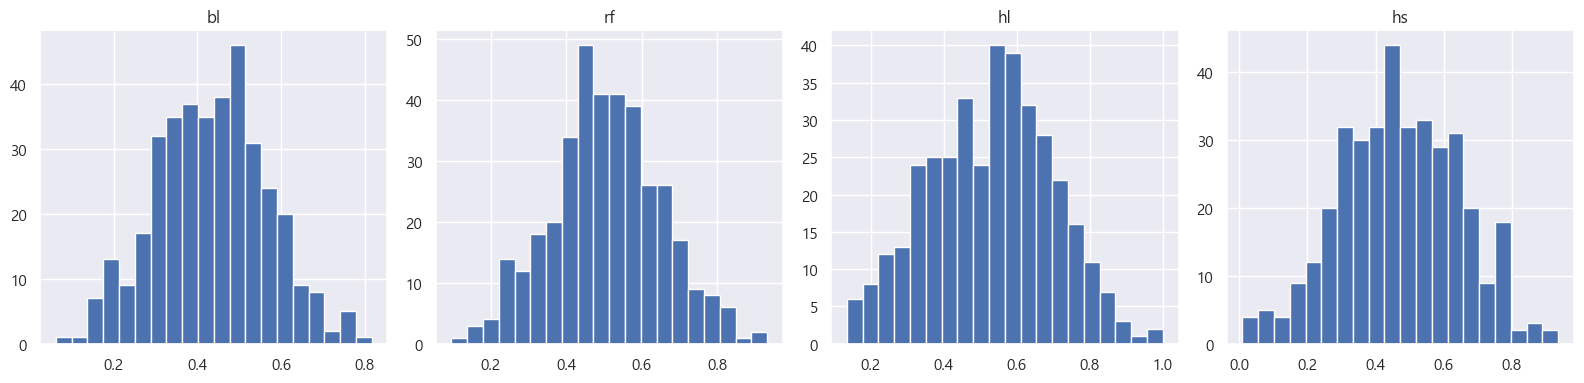

In [5]:
df.hist(figsize=(16, 4), bins=20, layout=(1, 4))
plt.tight_layout()
plt.show()

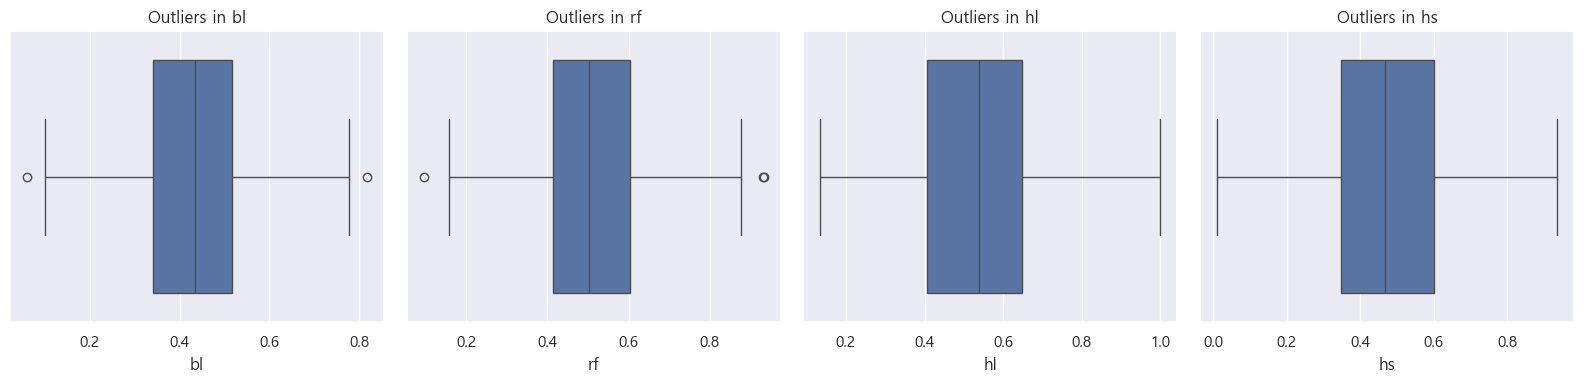

In [6]:
numeric_cols = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:6]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

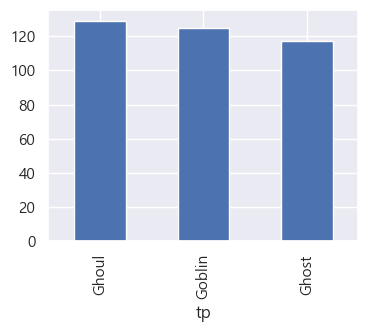

In [7]:
plt.figure(figsize=(4, 3))
df['tp'].value_counts().plot(kind='bar')
plt.show()

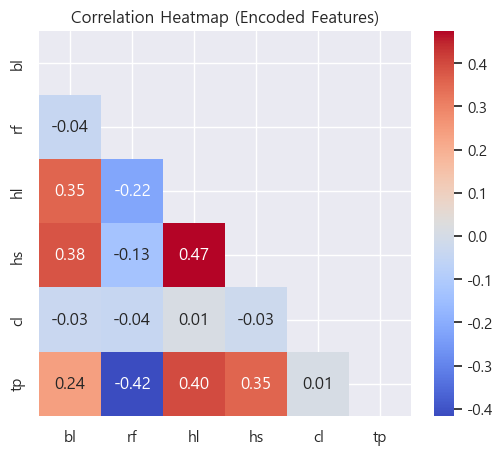

In [8]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(df)ÏùÑ Î≥µÏÇ¨ÌïòÏó¨ Ïù∏ÏΩîÎî© ÏßÑÌñâ
df_encoded = df.copy()

# 'cl'Í≥º 'tp' Ïª¨ÎüºÏùÑ Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏúºÎ°ú Ïà´ÏûêÎ°ú Î≥ÄÌôò
le = LabelEncoder()
df_encoded['cl'] = le.fit_transform(df_encoded['cl'])
df_encoded['tp'] = le.fit_transform(df_encoded['tp'])

# --- Ïù¥Ï†ú Î™®Îì† Ïª¨ÎüºÏù¥ Ïà´ÏûêÏù¥ÎØÄÎ°ú ÌûàÌä∏Îßµ ÏÉùÏÑ± Í∞ÄÎä• ---
plt.figure(figsize=(6, 5)) # figsizeÎ•º Ï°∞Í∏à ÌÇ§Ïõå Í∞ÄÎèÖÏÑ± ÌôïÎ≥¥

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df_encoded.corr()

# ÌûàÌä∏Îßµ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± (Ï§ëÎ≥µÎêòÎäî ÏÉÅÎã® ÏÇºÍ∞ÅÌòï Í∞ÄÎ¶¨Í∏∞)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap (Encoded Features)')
plt.show()

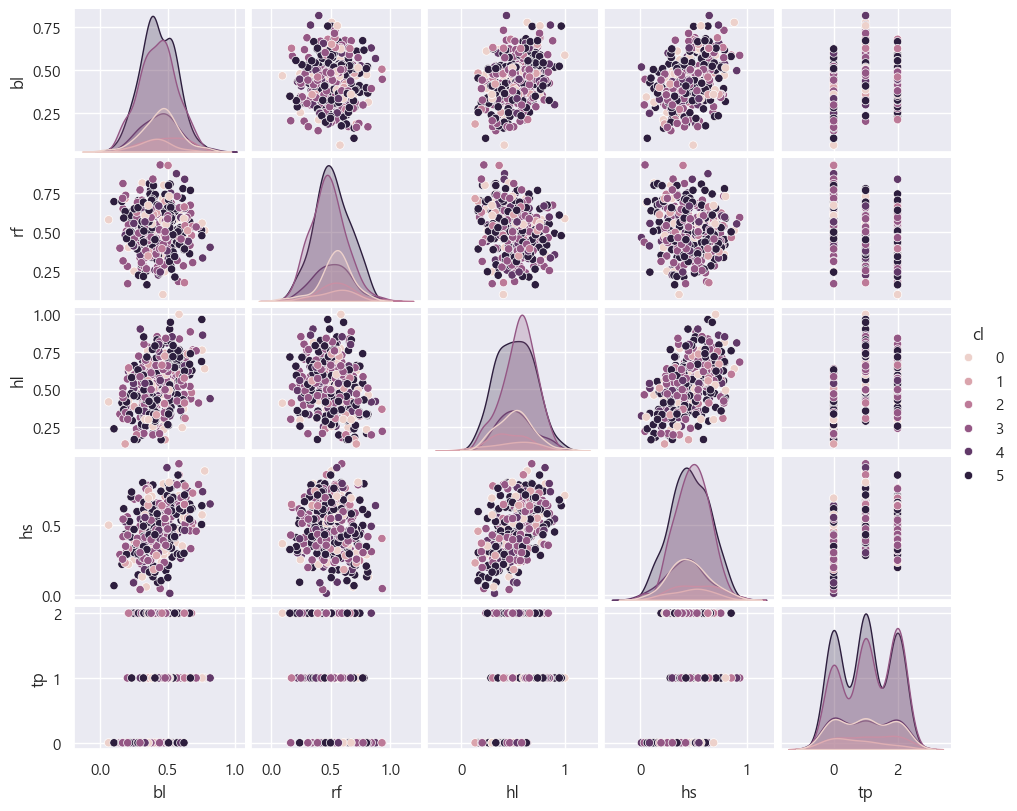

In [9]:
g = sns.pairplot(data = df_encoded,
                 hue="cl" 
                 , diag_kind="kde"
                )
g.fig.set_size_inches(10, 8)
plt.show()

# Í≥µÌÜµÌï®Ïàò myscore

In [10]:
# ----------------------------------------------------
# ÏµúÍ≥† Ï†êÏàò Í∏∞Î°ùÏùÑ ÏúÑÌïú Í∏ÄÎ°úÎ≤å Î≥ÄÏàò (Ïã§Ìñâ Ï†Ñ Ï¥àÍ∏∞Ìôî ÌïÑÏàò)
# ----------------------------------------------------
best_scores = None


# ----------------------------------------------------
# Î∂ÑÎ•òÏö© ÏµúÏ¢Ö myscore Ìï®Ïàò
# ----------------------------------------------------

def myscore(target, X80=None, y80=None, X20=None, y20=None, model=None, df=None, fi=None, top_n=None):
    """
    [Î∂ÑÎ•òÏö©] Î™®Îç∏ÏùÑ ÌïôÏäµ/ÌèâÍ∞ÄÌïòÍ≥†, Í∞ÄÏû• Ï¢ãÏïòÎçò Accuracy Ï†êÏàòÏôÄ ÌòÑÏû¨ Ï†êÏàòÎ•º ÎπÑÍµêÌï©ÎãàÎã§.
    - target: dfÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌÉÄÍ≤ü(Y) Ïª¨ÎüºÏùò Ïù¥Î¶ÑÏùÑ Î¨∏ÏûêÏó¥Î°ú Ï†ÑÎã¨Ìï¥Ïïº Ìï©ÎãàÎã§.
    - fi=TrueÏùº Í≤ΩÏö∞, feature_importances_ ÎòêÎäî coef_ Î•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    """
    global best_scores
    precision = 5

    # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    if df is not None:
        y = df[target]
        X = df.drop(columns=[target], errors='ignore')
        if y.dtype == 'object' or pd.api.types.is_categorical_dtype(y):
            le = LabelEncoder()
            y = le.fit_transform(y)
        X80, X20, y80, y20 = train_test_split(X, y, test_size=0.2, random_state=8989, stratify=y)

    # Í∏∞Î≥∏ Î™®Îç∏ ÏÑ§Ï†ï Î∞è ÌïôÏäµ
    if model is None:
        model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')
    model.fit(X80, y80)

    # ÏòàÏ∏° Î∞è ÌôïÎ•† Í≥ÑÏÇ∞
    pred = model.predict(X20)
    pred_proba = model.predict_proba(X20)

    # ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
    num_classes = len(np.unique(y80))
    avg_method = 'binary' if num_classes == 2 else 'macro'
    
    current_scores = {
        'Accuracy': round(accuracy_score(y20, pred), precision),
        'Precision': round(precision_score(y20, pred, average=avg_method, zero_division=0), precision),
        'Recall': round(recall_score(y20, pred, average=avg_method, zero_division=0), precision),
        'F1_Score': round(f1_score(y20, pred, average=avg_method, zero_division=0), precision),
        'LogLoss': round(log_loss(y20, pred_proba), precision)
    }
    try:
        if num_classes == 2:
            current_scores['ROC_AUC'] = round(roc_auc_score(y20, pred_proba[:, 1]), precision)
        else:
            current_scores['ROC_AUC'] = round(roc_auc_score(y20, pred_proba, multi_class='ovo'), precision)
    except ValueError:
        current_scores['ROC_AUC'] = 0.0

    # Ï†êÏàò Ï∂úÎ†•
    print(f"MODEL : {model.__class__.__name__}")
    for key, val in current_scores.items():
         print(f"{key:<10} : {val:.5f}")
    print("-" * 30)

    # ÏµúÍ≥† Í∏∞Î°ù Í∞±Ïã† (Accuracy Í∏∞Ï§Ä)
    if best_scores is None or current_scores['Accuracy'] > best_scores.get('Accuracy', 0):
        if best_scores is not None:
            print("üéâ New Best Accuracy Score Achieved! üéâ")
        else:
            print("üöÄ Ï≤´ Ïã§ÌñâÏûÖÎãàÎã§. ÏµúÍ≥† Ï†êÏàò(Accuracy) Í∏∞Ï§ÄÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.")
        best_scores = current_scores
    
    # Ï†êÏàò ÎπÑÍµê Ï∂úÎ†•
    print("--- Score Comparison (Current vs Best Accuracy) ---")
    for key, current_val in current_scores.items():
        best_val = best_scores.get(key, 0)
        diff = round(current_val - best_val, precision)
        change_indicator = "‚ûñ" if diff == 0 else ("üìà" if (diff > 0 if key != 'LogLoss' else diff < 0) else "üìâ")
        print(f'{key:<10}: {current_val:.5f} (Best: {best_val:.5f}) | Change: {diff:+.5f} {change_indicator}')
    print("-" * 30 + "\n")

    # Feature ÏãúÍ∞ÅÌôî
    if fi:
        if isinstance(model, Pipeline): actual_model = model.steps[-1][1]
        else: actual_model = model
        
        feature_names = X80.columns
        title_text = f'Feature Analysis ({actual_model.__class__.__name__})'
        fi_df = None

        if hasattr(actual_model, 'feature_importances_'):
            importances = actual_model.feature_importances_
            fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
            plot_x, plot_y = 'feature', 'importance'
            title_text = f'Feature Importances'

        elif hasattr(actual_model, 'coef_'):
            coefficients = actual_model.coef_[0] if len(actual_model.coef_.shape) > 1 else actual_model.coef_
            fi_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
            fi_df = fi_df.reindex(fi_df.coefficient.abs().sort_values(ascending=False).index)
            plot_x, plot_y = 'feature', 'coefficient'
            title_text = f'Feature Coefficients'

        else:
            print(f"\nNOTE: Ïù¥ Î™®Îç∏({actual_model.__class__.__name__})ÏùÄ feature_importances_ ÎòêÎäî coef_ ÏÜçÏÑ±Ïù¥ ÏóÜÏäµÎãàÎã§.")
            return

        if top_n is not None:
            fi_df = fi_df.head(top_n)
            title_text = f'Top {top_n} ' + title_text
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=plot_x, y=plot_y, data=fi_df)
        plt.title(f'{title_text} ({actual_model.__class__.__name__})')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # return model

## Ï≤´ Î≤àÏß∏ Ï†êÏàò ÌôïÏù∏

MODEL : XGBClassifier
Accuracy   : 0.69333
Precision  : 0.68128
Recall     : 0.69474
F1_Score   : 0.68239
LogLoss    : 1.01385
ROC_AUC    : 0.84261
------------------------------
üöÄ Ï≤´ Ïã§ÌñâÏûÖÎãàÎã§. ÏµúÍ≥† Ï†êÏàò(Accuracy) Í∏∞Ï§ÄÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
--- Score Comparison (Current vs Best Accuracy) ---
Accuracy  : 0.69333 (Best: 0.69333) | Change: +0.00000 ‚ûñ
Precision : 0.68128 (Best: 0.68128) | Change: +0.00000 ‚ûñ
Recall    : 0.69474 (Best: 0.69474) | Change: +0.00000 ‚ûñ
F1_Score  : 0.68239 (Best: 0.68239) | Change: +0.00000 ‚ûñ
LogLoss   : 1.01385 (Best: 1.01385) | Change: +0.00000 ‚ûñ
ROC_AUC   : 0.84261 (Best: 0.84261) | Change: +0.00000 ‚ûñ
------------------------------



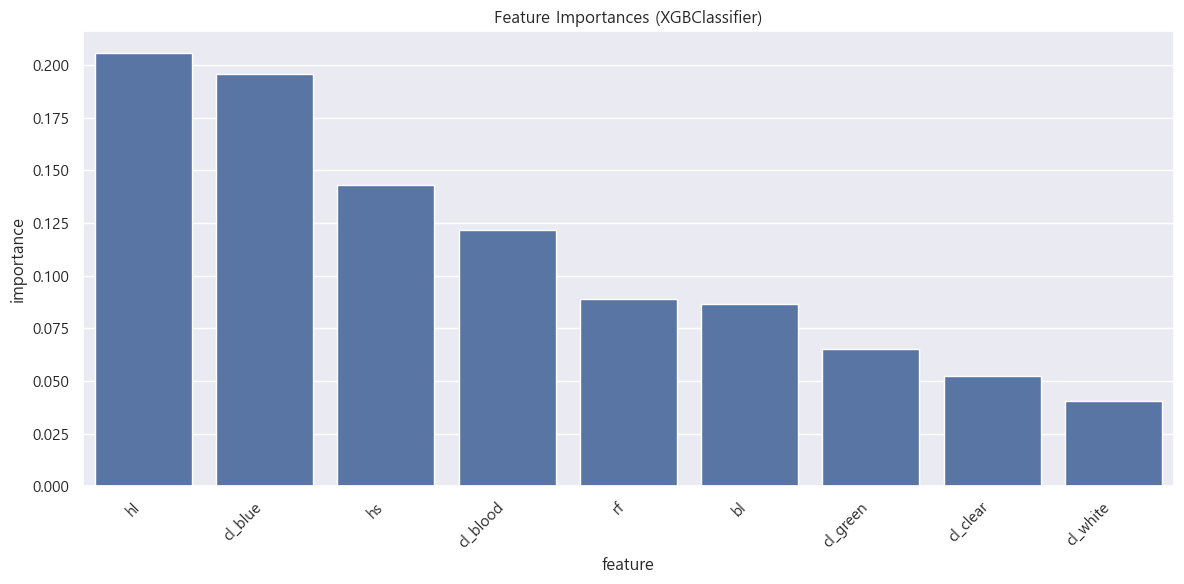

In [11]:
# Ï†êÏàò ÌôïÏù∏ÏùÑ ÏúÑÌï¥ ÏûÑÏãúÎ°ú 'cl' Ïª¨ÎüºÏùÑ Ïõê-Ìï´ Ïù∏ÏΩîÎî©
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ï≤´ Î≤àÏß∏ Ïπ¥ÌÖåÍ≥†Î¶¨Îäî ÏÇ≠Ï†ú
df_encoded = pd.get_dummies(df, columns=['cl'], drop_first=True)
myscore(target='tp', df=df_encoded, fi=True)

## Ï§ëÍ∞Ñ Ï†úÏ∂ú

In [12]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùº(submission.csv)Ïóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. ÌÉÄÍ≤ü Î≥ÄÏàò(type)Î•º Label EncodingÏúºÎ°ú Ïà´ÏûêÎ°ú Î≥ÄÌôò ---
# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin' Îì±)Î°ú ÎêòÎèåÎ¶¨Í∏∞ ÏúÑÌï¥
# LabelEncoder Í∞ùÏ≤¥(le)Î•º Ï†ÄÏû•Ìï¥ Îë°ÎãàÎã§.
le = LabelEncoder()
train_df['type'] = le.fit_transform(train_df['type'])


# --- 2-2. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌîºÏ≥ê(X)Îßå ÏÑ†ÌÉù ---
# Î∂àÌïÑÏöîÌïú 'id'ÏôÄ ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ 'type'ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
X_train = train_df.drop(columns=['id', 'type'])
X_test = test_df.drop(columns=['id'])


# --- 2-3. 'color' ÌîºÏ≥êÎ•º Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
# Ï§ëÏöî: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨ÎüºÏùÑ ÎèôÏùºÌïòÍ≤å ÎßåÎì§Í∏∞ ÏúÑÌï¥
# Îëê Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥§Îã§Í∞Ä Ïù∏ÏΩîÎî© ÌõÑ Îã§Ïãú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
combined_df = pd.concat([X_train, X_test], keys=['train', 'test'])
combined_df_encoded = pd.get_dummies(combined_df, columns=['color'], drop_first=True)

# Îã§Ïãú ÌïôÏäµÏö©Í≥º ÌÖåÏä§Ìä∏Ïö©ÏúºÎ°ú Î∂ÑÎ¶¨
X_train_final = combined_df_encoded.loc['train']
X_test_final = combined_df_encoded.loc['test']

# ÌÉÄÍ≤ü Î≥ÄÏàò(y) Ï†ïÏùò
y_train_final = train_df['type']

print("ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò Î™®Îç∏ Ï§ë ÌïòÎÇòÏù∏ XGBClassifierÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ï†úÏ∂ú ÏãúÏóêÎäî Î™®Îì† ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∑πÎåÄÌôîÌï©ÎãàÎã§.
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# ÌïôÏäµÎêú Î™®Îç∏Î°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Í≥ºÎ•º ÏòàÏ∏°Ìï©ÎãàÎã§.
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
# Ï∫êÍ∏Ä Ï†úÏ∂ú ÏñëÏãùÏóê ÎßûÏ∂∞ DataFrameÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§. index=FalseÎäî Î∂àÌïÑÏöîÌïú Ïù∏Îç±Ïä§ Ïª¨ÎüºÏù¥ Ï†ÄÏû•ÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.
ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


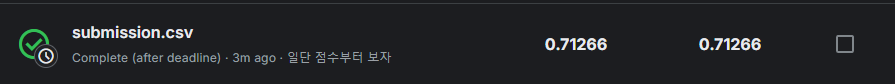

# Ï†ÑÏ≤òÎ¶¨ & Í∞ÄÍ≥µ

## Ïù∏ÏΩîÎî© (dfe)

In [13]:
dfe = pd.get_dummies(df, columns=['cl'])

def tppop(df):
    tp_col = df.pop('tp')
    df['tp'] = tp_col

tppop(dfe)
dfe.head()

bl        rf        hl        hs  cl_black  cl_blood  cl_blue  \
0  0.354512  0.350839  0.465761  0.781142     False     False    False   
1  0.575560  0.425868  0.531401  0.439899     False     False    False   
2  0.467875  0.354330  0.811616  0.791225      True     False    False   
3  0.776652  0.508723  0.636766  0.884464      True     False    False   
4  0.566117  0.875862  0.418594  0.636438     False     False    False   

   cl_clear  cl_green  cl_white      tp  
0      True     False     False   Ghoul  
1     False      True     False  Goblin  
2     False     False     False   Ghoul  
3     False     False     False   Ghoul  
4     False      True     False   Ghost

## Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (dft)

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
dft = dfe.copy()

for col in numeric_cols:

    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dft = dft[(dft[col] >= lower_bound) & (dft[col] <= upper_bound)]

print("Original data shape:", df.shape)
print("Data shape after removing outliers:", dft.shape)

Original data shape: (371, 6)
Data shape after removing outliers: (366, 11)


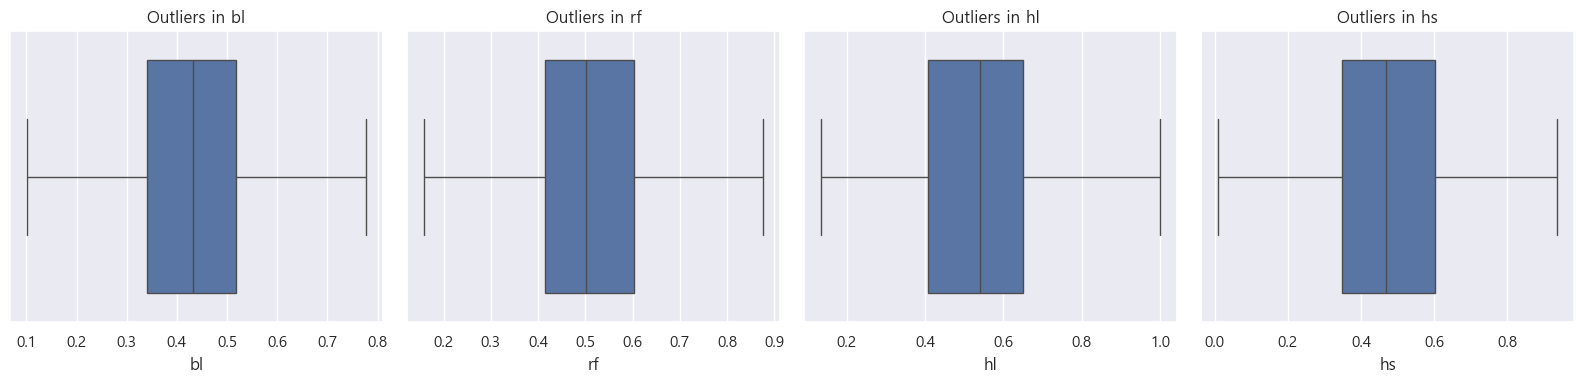

In [15]:
numeric_cols = dft.select_dtypes(include='number').columns

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:6]):
    sns.boxplot(x=dft[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

### Ï†êÏàò ÌôïÏù∏

MODEL : XGBClassifier
Accuracy   : 0.70270
Precision  : 0.70679
Recall     : 0.70999
F1_Score   : 0.70252
LogLoss    : 0.97687
ROC_AUC    : 0.87145
------------------------------
üéâ New Best Accuracy Score Achieved! üéâ
--- Score Comparison (Current vs Best Accuracy) ---
Accuracy  : 0.70270 (Best: 0.70270) | Change: +0.00000 ‚ûñ
Precision : 0.70679 (Best: 0.70679) | Change: +0.00000 ‚ûñ
Recall    : 0.70999 (Best: 0.70999) | Change: +0.00000 ‚ûñ
F1_Score  : 0.70252 (Best: 0.70252) | Change: +0.00000 ‚ûñ
LogLoss   : 0.97687 (Best: 0.97687) | Change: +0.00000 ‚ûñ
ROC_AUC   : 0.87145 (Best: 0.87145) | Change: +0.00000 ‚ûñ
------------------------------



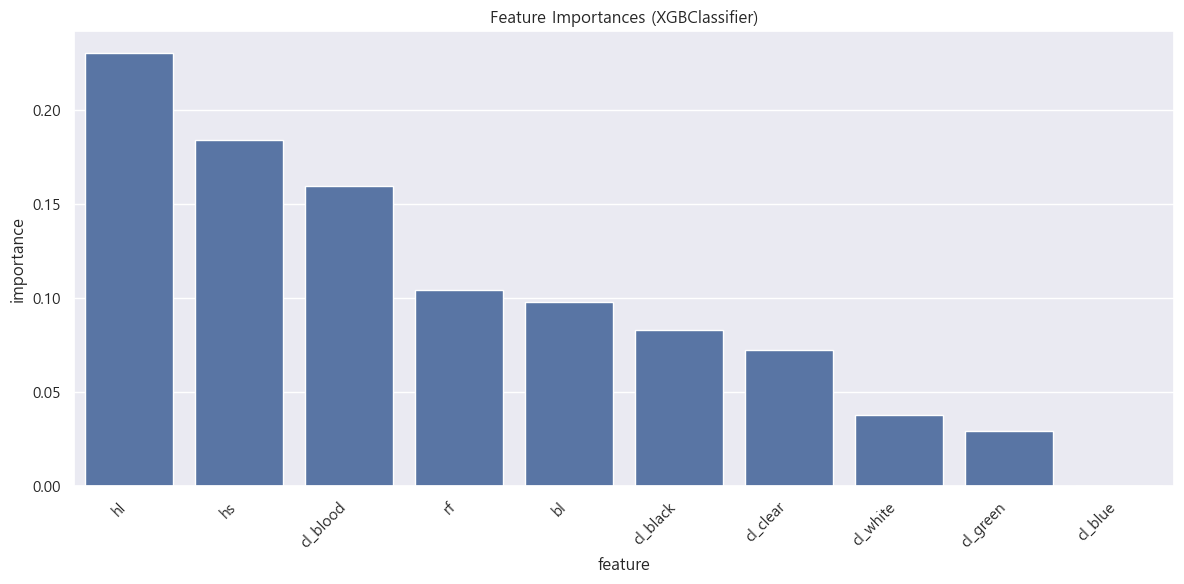

In [16]:
myscore(target='tp', df=dft, fi=True)

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

In [17]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)


# --- 2-4. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†ÅÏö© ---
numeric_cols = train_df.select_dtypes(include='number').columns
dft = train_dfe.copy()

for col in numeric_cols:
    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dft = dft[(dft[col] >= lower_bound) & (dft[col] <= upper_bound)]

print(f"Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†Ñ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: {train_dfe.shape}")
print(f"Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: {dft.shape}")
# Ï§ëÏöî: ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Îç∞Ïù¥ÌÑ∞Îäî Ï†úÍ±∞ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Î™®Îì† ÏÉòÌîåÏùÑ ÏòàÏ∏°Ìï¥Ïïº Ìï©ÎãàÎã§.


# --- 2-5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨ Î∞è Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
le = LabelEncoder()
y_train_final = le.fit_transform(dft['tp'])
X_train_final = dft.drop(columns=['tp'])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ï†ÑÏ≤òÎ¶¨Îêú dfeÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
X_test_final = test_dfe.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑú Î∞è Í∞úÏàòÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
# ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÎßåÎì§Ïñ¥ÏßÑ Ïª¨ÎüºÏù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏùÑ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols] # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ïª¨Îüº ÏàúÏÑúÍπåÏßÄ ÏùºÏπò

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞Îêú Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.
Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†Ñ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: (371, 11)
Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: (366, 11)

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


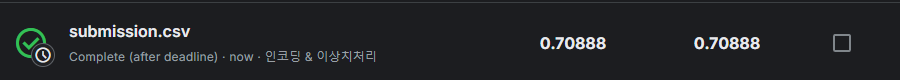

## Ïù∏ÏΩîÎî©/Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌïÑÏöî ÌôïÏù∏

### Ïù∏ÏΩîÎî©Îßå

In [18]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Îã®Í≥ÑÎ•º Í±¥ÎÑàÎõ∞Í≥†, Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞Î•º Î∞îÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])

X_test_final = test_dfe.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑú Î∞è Í∞úÏàòÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols] # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ïª¨Îüº ÏàúÏÑúÍπåÏßÄ ÏùºÏπò

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. (Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†úÏô∏)")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞ÎêòÏßÄ ÏïäÏùÄ Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. (Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†úÏô∏)
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


#### Ï§ëÍ∞Ñ Ï†úÏ∂ú

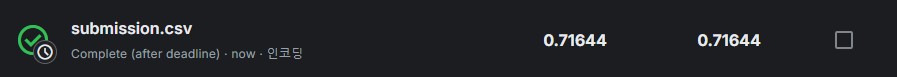

### Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Îßå (Trimming)

In [19]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'cl'(color) Ïª¨Îüº Ï†úÍ±∞ ---
# Ïù∏ÏΩîÎî©ÏùÑ ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú, Î¨∏ÏûêÏó¥Ïù∏ 'cl' Ïª¨ÎüºÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.
train_df = train_df.drop(columns=['cl'])
test_df = test_df.drop(columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_df = tppop(train_df)


# --- 2-4. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†ÅÏö© ---
numeric_cols = train_df.select_dtypes(include='number').columns
dft = train_df.copy() # Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÌïòÏßÄ ÏïäÏùÄ train_dfÎ•º Î≥µÏÇ¨

for col in numeric_cols:
    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dft = dft[(dft[col] >= lower_bound) & (dft[col] <= upper_bound)]

print(f"Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†Ñ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: {train_df.shape}")
print(f"Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: {dft.shape}")


# --- 2-5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨ Î∞è Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
le = LabelEncoder()
y_train_final = le.fit_transform(dft['tp'])
X_train_final = dft.drop(columns=['tp'])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî 'cl' Ïª¨ÎüºÎßå Ï†úÍ±∞Îêú ÏõêÎ≥∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
X_test_final = test_df.copy()

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. ('cl' Ïª¨Îüº Ï†úÏô∏)")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞Îêú Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.
Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†Ñ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: (371, 5)
Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: (366, 5)

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. ('cl' Ïª¨Îüº Ï†úÏô∏)
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


#### Ï§ëÍ∞Ñ Ï†úÏ∂ú

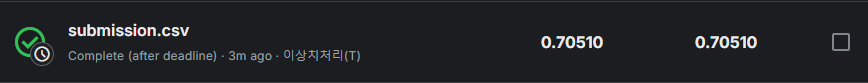

### Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Îßå (Winsorization)

In [20]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'cl'(color) Ïª¨Îüº Ï†úÍ±∞ ---
# Ïù∏ÏΩîÎî©ÏùÑ ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú, Î¨∏ÏûêÏó¥Ïù∏ 'cl' Ïª¨ÎüºÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.
train_df = train_df.drop(columns=['cl'])
test_df = test_df.drop(columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_df = tppop(train_df)


# --- 2-4. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†ÅÏö© (Winsorization Î∞©Ïãù) ---
# Ï§ëÏöî: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Î•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Í∞Ä Îã¨ÎùºÏ†∏ Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ï†ÄÌïòÎê† Ïàò ÏûàÏäµÎãàÎã§.
numeric_cols = train_df.select_dtypes(include='number').columns
dft = train_df.copy()

print("Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (Winsorization) Ï†ÅÏö© Ï§ë...")
for col in numeric_cols:
    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # lower_boundÎ≥¥Îã§ ÏûëÏùÄ Í∞íÏùÄ lower_boundÎ°ú, upper_boundÎ≥¥Îã§ ÌÅ∞ Í∞íÏùÄ upper_boundÎ°ú ÎåÄÏ≤¥
    dft[col] = np.where(dft[col] < lower_bound, lower_bound, dft[col])
    dft[col] = np.where(dft[col] > upper_bound, upper_bound, dft[col])

# ÏúàÏ†ÄÎùºÏù¥Ï†úÏù¥ÏÖòÏùÄ Îç∞Ïù¥ÌÑ∞ shapeÏù¥ Î≥ÄÌïòÏßÄ ÏïäÏäµÎãàÎã§.
print(f"Ï≤òÎ¶¨ ÌõÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: {dft.shape} (Î≥ÄÍ≤Ω ÏóÜÏùå)")


# --- 2-5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨ Î∞è Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
le = LabelEncoder()
y_train_final = le.fit_transform(dft['tp'])
X_train_final = dft.drop(columns=['tp'])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî 'cl' Ïª¨ÎüºÎßå Ï†úÍ±∞Îêú ÏõêÎ≥∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
X_test_final = test_df.copy()

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. ('cl' Ïª¨Îüº Ï†úÏô∏, Winsorization Ï†ÅÏö©)")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# Ïù¥ÏÉÅÏπòÍ∞Ä Ï≤òÎ¶¨Îêú Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.
Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (Winsorization) Ï†ÅÏö© Ï§ë...
Ï≤òÎ¶¨ ÌõÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ shape: (371, 5) (Î≥ÄÍ≤Ω ÏóÜÏùå)

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. ('cl' Ïª¨Îüº Ï†úÏô∏, Winsorization Ï†ÅÏö©)
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


#### Ï§ëÍ∞Ñ Ï†úÏ∂ú

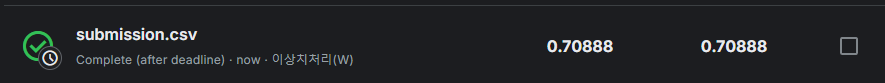

## Ïä§ÏºÄÏùºÎßÅ (dfe)

In [21]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss'))
])

### Ï†êÏàò ÌôïÏù∏

MODEL : Pipeline
Accuracy   : 0.72000
Precision  : 0.71276
Recall     : 0.72141
F1_Score   : 0.71405
LogLoss    : 0.94593
ROC_AUC    : 0.85643
------------------------------
üéâ New Best Accuracy Score Achieved! üéâ
--- Score Comparison (Current vs Best Accuracy) ---
Accuracy  : 0.72000 (Best: 0.72000) | Change: +0.00000 ‚ûñ
Precision : 0.71276 (Best: 0.71276) | Change: +0.00000 ‚ûñ
Recall    : 0.72141 (Best: 0.72141) | Change: +0.00000 ‚ûñ
F1_Score  : 0.71405 (Best: 0.71405) | Change: +0.00000 ‚ûñ
LogLoss   : 0.94593 (Best: 0.94593) | Change: +0.00000 ‚ûñ
ROC_AUC   : 0.85643 (Best: 0.85643) | Change: +0.00000 ‚ûñ
------------------------------



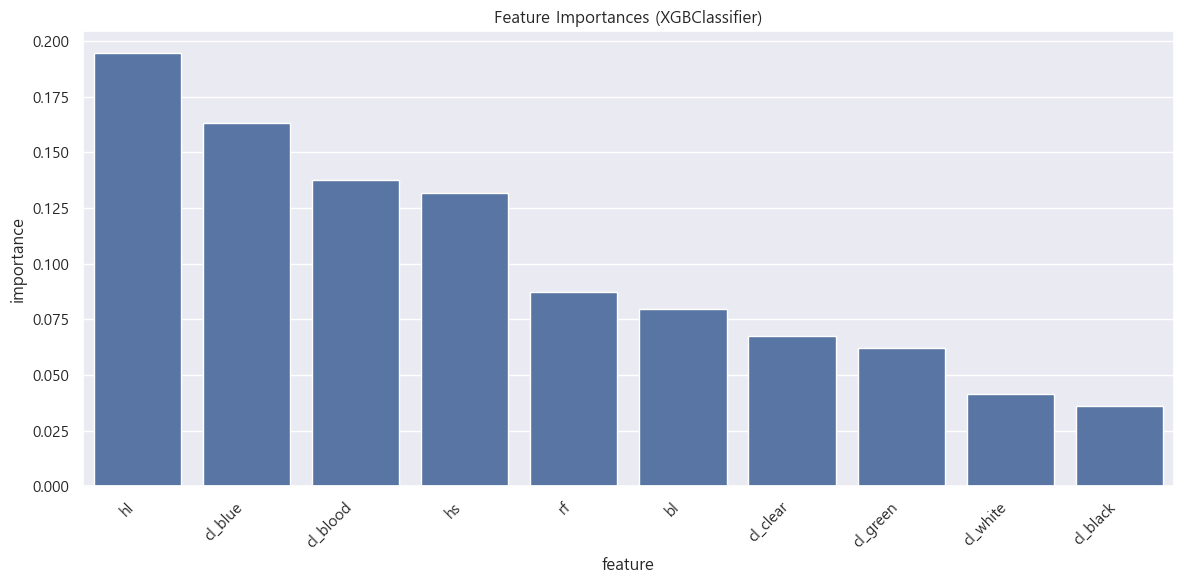

In [22]:
# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Îäî Ï†úÏô∏
myscore(target='tp', df=dfe, model=pipe, fi=True)

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Îã®Í≥ÑÎ•º Í±¥ÎÑàÎõ∞Í≥†, Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞Î•º Î∞îÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])

X_test_final = test_dfe.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑú Î∞è Í∞úÏàòÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols] # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ïª¨Îüº ÏàúÏÑúÍπåÏßÄ ÏùºÏπò

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. (Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†úÏô∏)")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# StandardScalerÏôÄ XGBClassifierÎ•º Ìè¨Ìï®ÌïòÎäî ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏµúÏ¢Ö Î™®Îç∏Î°ú Ï†ïÏùòÌï©ÎãàÎã§.
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss'))
])

# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞Îäî ÌååÏù¥ÌîÑÎùºÏù∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûêÎèôÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅÎê©ÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî ÌïôÏäµ Ïãú ÌïôÏäµÎêú Ïä§ÏºÄÏùºÎü¨ Í∏∞Ï§ÄÏúºÎ°ú ÏûêÎèô Î≥ÄÌôòÎê©ÎãàÎã§.
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. (Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†úÏô∏)
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


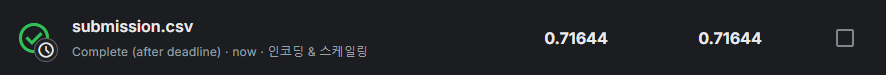

## Ïä§ÏºÄÏùºÎßÅ Î∞©Ïãù Î≥ÄÍ≤Ω
* Í∏∞Ï°¥Ïóî StandardScaler ÏòÄÏùå

### MinMaxScaler

In [24]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])

X_test_final = test_dfe.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑú Î∞è Í∞úÏàòÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# StandardScaler ÎåÄÏã† MinMaxScalerÎ•º ÏÇ¨Ïö©ÌïòÎäî ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
final_model = Pipeline([
    ('scaler', MinMaxScaler()), # <--- Ïä§ÏºÄÏùºÎü¨ Î≥ÄÍ≤Ω
    ('model', XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss'))
])

# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


#### Ï§ëÍ∞Ñ Ï†úÏ∂ú

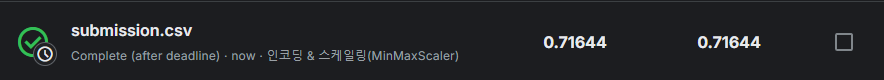

### RobustScaler

In [25]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])

X_test_final = test_dfe.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑú Î∞è Í∞úÏàòÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# MinMaxScaler ÎåÄÏã† RobustScalerÎ•º ÏÇ¨Ïö©ÌïòÎäî ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
final_model = Pipeline([
    ('scaler', RobustScaler()), # <--- Ïä§ÏºÄÏùºÎü¨ Î≥ÄÍ≤Ω
    ('model', XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss'))
])

# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.

ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.
ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.

‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:
   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghoul
4  13   Ghost


#### Ï§ëÍ∞Ñ Ï†úÏ∂ú

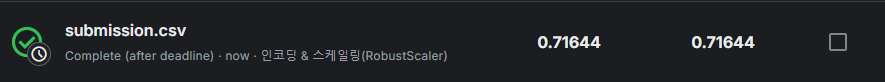

## ÌååÏÉù ÌîºÏ≥ê Ï∂îÍ∞Ä (dff)

In [26]:
dff = dft.copy()

# 0ÏúºÎ°ú ÎÇòÎàÑÎäî Ïò§Î•òÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Î∂ÑÎ™®Ïóê ÏïÑÏ£º ÏûëÏùÄ Í∞í(1e-6)ÏùÑ ÎçîÌï¥Ï§çÎãàÎã§.
dff['bl_rf_ratio'] = dff['bl'] / (dff['rf'] + 1e-6)
dff['bl_hl_ratio'] = dff['bl'] / (dff['hl'] + 1e-6)
dff['rf_hl_ratio'] = dff['rf'] / (dff['hl'] + 1e-6)

dff['humanoid_index'] = dff['bl'] * dff['hs']
dff['decay_index'] = dff['rf'] * dff['hl']
dff['body_sum'] = dff['bl'] + dff['rf'] + dff['hl']

tppop(dff)
dff.head()

bl        rf        hl        hs  bl_rf_ratio  bl_hl_ratio  \
0  0.354512  0.350839  0.465761  0.781142     1.010467     0.761145   
1  0.575560  0.425868  0.531401  0.439899     1.351494     1.083096   
2  0.467875  0.354330  0.811616  0.791225     1.320446     0.576473   
3  0.776652  0.508723  0.636766  0.884464     1.526669     1.219682   
4  0.566117  0.875862  0.418594  0.636438     0.646353     1.352422   

   rf_hl_ratio  humanoid_index  decay_index  body_sum      tp  
0     0.753258        0.276924     0.163407  1.171112   Ghoul  
1     0.801405        0.253188     0.226307  1.532830  Goblin  
2     0.436573        0.370195     0.287580  1.633822   Ghoul  
3     0.798915        0.686921     0.323937  1.922141   Ghoul  
4     2.092386        0.360298     0.366630  1.860572   Ghost

### Ï†êÏàò ÌôïÏù∏

In [ ]:
myscore(target='tp', df=dff, fi=True)

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂ú ÌååÏùºÏóê ÌïÑÏöîÌïú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò idÎ•º ÎØ∏Î¶¨ Ï†ÄÏû•Ìï©ÎãàÎã§.
test_ids = test_df_raw['id']

print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================

# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨: id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. [Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ] ÌååÏÉù ÌîºÏ≥ê ÏÉùÏÑ± Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def create_features(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÌååÏÉù ÌîºÏ≥êÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§."""
    # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Ïò§Î•ò Î∞©ÏßÄÎ•º ÏúÑÌï¥ Î∂ÑÎ™®Ïóê ÏûëÏùÄ Í∞í(1e-6)ÏùÑ ÎçîÌï©ÎãàÎã§.
    df['bl_rf_ratio'] = df['bl'] / (df['rf'] + 1e-6)
    df['bl_hl_ratio'] = df['bl'] / (df['hl'] + 1e-6)
    df['rf_hl_ratio'] = df['rf'] / (df['hl'] + 1e-6)
    
    # ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≥ê
    df['humanoid_index'] = df['bl'] * df['hs']
    df['decay_index'] = df['rf'] * df['hl']
    df['body_sum'] = df['bl'] + df['rf'] + df['hl']
    return df

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
train_dff = create_features(train_dfe)
test_dff = create_features(test_dfe)

print("ÌååÏÉù ÌîºÏ≥ê ÏÉùÏÑ± ÏôÑÎ£å.")


# --- 2-4. ÌÉÄÍ≤ü Î≥ÄÏàò('tp')Î•º Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò Ï†ïÏùò Î∞è Ï†ÅÏö© ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dff = tppop(train_dff)


# --- 2-5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
le = LabelEncoder()
y_train_final = le.fit_transform(train_dff['tp'])
X_train_final = train_dff.drop(columns=['tp'])

X_test_final = test_dff.copy()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨Îüº ÏàúÏÑú Î∞è Í∞úÏàòÎ•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols] # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ïª¨Îüº ÏàúÏÑúÍπåÏßÄ ÏùºÏπò

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# ÌååÏÉù ÌîºÏ≥êÍ∞Ä Ï∂îÍ∞ÄÎêú Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_final, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)

# ÏòàÏ∏°Îêú Ïà´Ïûê(0, 1, 2)Î•º Îã§Ïãú ÏõêÎûòÏùò Î¨∏ÏûêÏó¥('Ghoul', 'Goblin', 'Ghost')Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
predictions = le.inverse_transform(predictions_numeric)

print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

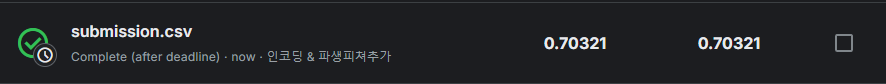

## ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(df)ÏùÑ Î≥µÏÇ¨ÌïòÏó¨ Ïù∏ÏΩîÎî© ÏßÑÌñâ
df_encoded = dff.copy()

# 'cl'Í≥º 'tp' Ïª¨ÎüºÏùÑ Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏúºÎ°ú Ïà´ÏûêÎ°ú Î≥ÄÌôò
le = LabelEncoder()
df_encoded['tp'] = le.fit_transform(df_encoded['tp'])

# --- Ïù¥Ï†ú Î™®Îì† Ïª¨ÎüºÏù¥ Ïà´ÏûêÏù¥ÎØÄÎ°ú ÌûàÌä∏Îßµ ÏÉùÏÑ± Í∞ÄÎä• ---
plt.figure(figsize=(10, 7)) # figsizeÎ•º Ï°∞Í∏à ÌÇ§Ïõå Í∞ÄÎèÖÏÑ± ÌôïÎ≥¥

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df_encoded.corr()

# ÌûàÌä∏Îßµ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± (Ï§ëÎ≥µÎêòÎäî ÏÉÅÎã® ÏÇºÍ∞ÅÌòï Í∞ÄÎ¶¨Í∏∞)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap (Encoded Features)')
plt.show()

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# ==============================================================================
# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨ ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']
test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌååÏÉù ÌîºÏ≥ê ÏÉùÏÑ± ---
def create_features(df):
    df['bl_rf_ratio'] = df['bl'] / (df['rf'] + 1e-6)
    df['bl_hl_ratio'] = df['bl'] / (df['hl'] + 1e-6)
    df['rf_hl_ratio'] = df['rf'] / (df['hl'] + 1e-6)
    df['humanoid_index'] = df['bl'] * df['hs']
    df['decay_index'] = df['rf'] * df['hl']
    df['body_sum'] = df['bl'] + df['rf'] + df['hl']
    return df

train_dff = create_features(train_dfe)
test_dff = create_features(test_dfe)
print("ÌååÏÉù ÌîºÏ≥ê ÏÉùÏÑ± ÏôÑÎ£å.")

# --- 2-4. ÌÉÄÍ≤ü Î≥ÄÏàò Ï≤òÎ¶¨ ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df
train_dff = tppop(train_dff)

# --- 2-5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
le = LabelEncoder()
y_train_final = le.fit_transform(train_dff['tp'])
X_train_final = train_dff.drop(columns=['tp'])
X_test_final = test_dff.copy()

# Ïª¨Îüº ÎßûÏ∂îÍ∏∞
train_cols = X_train_final.columns
test_cols = X_test_final.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0
X_test_final = X_test_final[train_cols]
print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ Î∞è ÌîºÏ≥ê ÏÑ†ÌÉù (‚≠ê Î≥ÄÍ≤ΩÎêú Î∂ÄÎ∂Ñ ‚≠ê)
# ==============================================================================
# Í∏∞Ï§Ä Î™®Îç∏Î°ú ÏÇ¨Ïö©Ìï† XGBClassifier Ï†ïÏùò
xgb_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# Î®ºÏ†Ä Ï†ÑÏ≤¥ ÌîºÏ≥êÎ°ú Î™®Îç∏ÏùÑ Ìïú Î≤à ÌïôÏäµÏãúÌÇµÎãàÎã§.
xgb_model.fit(X_train_final, y_train_final)
print("ÌîºÏ≥ê ÏÑ†ÌÉùÏùÑ ÏúÑÌïú Í∏∞Ï§Ä Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")

# SelectFromModelÏùÑ ÏÇ¨Ïö©Ìï¥ Ï§ëÏöîÌïú ÌîºÏ≥êÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
# threshold='median'ÏùÄ Ï§ëÏöîÎèÑÍ∞Ä Ï§ëÍ∞ÑÍ∞í Ïù¥ÏÉÅÏù∏ ÌîºÏ≥êÎì§Îßå ÏÑ†ÌÉùÌïòÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
selector = SelectFromModel(xgb_model, prefit=True, threshold='median')

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï§ëÏöîÌïú ÌîºÏ≥êÎì§Îßå ÎÇ®ÍπÅÎãàÎã§.
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

print(f"ÌîºÏ≥ê ÏÑ†ÌÉù ÏôÑÎ£å: {X_train_final.shape[1]}Í∞ú -> {X_train_selected.shape[1]}Í∞ú")


# ==============================================================================
# 4. ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≥ê ÏÇ¨Ïö©)
# ==============================================================================
# ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÏÉàÎ°ú Ï†ïÏùòÌï©ÎãàÎã§. (ÎèôÏùºÌïú Î™®Îç∏ ÏÇ¨Ïö©)
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# **ÏÑ†ÌÉùÎêú ÌîºÏ≥ê(X_train_selected)**Î°ú ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_selected, y_train_final)
print("ÏÑ†ÌÉùÎêú ÌîºÏ≥êÎ°ú ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° Î∞è Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")

submission_df = pd.DataFrame({ "id": test_ids, "type": predictions })
submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print(submission_df.head())

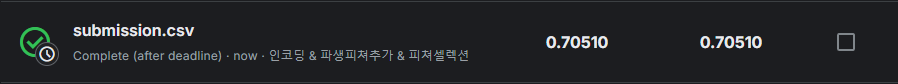

## ÌîºÏ≥ê ÏÖÄÎ†âÏÖò Î∞©Ïãù Î≥ÄÍ≤Ω

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# ==============================================================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")

# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# ==============================================================================
# --- 2-1. Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨ ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']
test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌååÏÉù ÌîºÏ≥ê ÏÉùÏÑ± ---
def create_features(df):
    df['bl_rf_ratio'] = df['bl'] / (df['rf'] + 1e-6)
    df['bl_hl_ratio'] = df['bl'] / (df['hl'] + 1e-6)
    df['rf_hl_ratio'] = df['rf'] / (df['hl'] + 1e-6)
    df['humanoid_index'] = df['bl'] * df['hs']
    df['decay_index'] = df['rf'] * df['hl']
    df['body_sum'] = df['bl'] + df['rf'] + df['hl']
    return df

train_dff = create_features(train_dfe)
test_dff = create_features(test_dfe)
print("ÌååÏÉù ÌîºÏ≥ê ÏÉùÏÑ± ÏôÑÎ£å.")

# --- 2-4. ÌÉÄÍ≤ü Î≥ÄÏàò Ï≤òÎ¶¨ ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df
train_dff = tppop(train_dff)

# --- 2-5. ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
le = LabelEncoder()
y_train_final = le.fit_transform(train_dff['tp'])
X_train_final = train_dff.drop(columns=['tp'])
X_test_final = test_dff.copy()

# Ïª¨Îüº ÎßûÏ∂îÍ∏∞
train_cols = X_train_final.columns
test_cols = X_test_final.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0
X_test_final = X_test_final[train_cols]
print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å.")


# ==============================================================================
# 3. RFEÎ•º Ïù¥Ïö©Ìïú ÌîºÏ≥ê ÏÑ†ÌÉù (‚≠ê Î≥ÄÍ≤ΩÎêú Î∂ÄÎ∂Ñ ‚≠ê)
# ==============================================================================
# RFEÏóê ÏÇ¨Ïö©Ìï† Í∏∞Î≥∏ Î™®Îç∏ Ï†ïÏùò
base_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# RFE Í∞ùÏ≤¥ ÏÉùÏÑ±
# n_features_to_selectÎäî ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌï† ÌîºÏ≥êÏùò Í∞úÏàòÏûÖÎãàÎã§. Ïù¥ Í∞íÏùÑ Ï°∞Ï†àÌïòÎ©∞ Ïã§ÌóòÌï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.
selector = RFE(estimator=base_model, n_features_to_select=10, step=1)

# RFEÎ•º Ïã§ÌñâÌïòÏó¨ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÏ∂îÍ≥†, Ï§ëÏöîÌïú ÌîºÏ≥êÎßå ÎÇ®ÍπÅÎãàÎã§.
X_train_selected = selector.fit_transform(X_train_final, y_train_final)
# ÌïôÏäµÎêú selectorÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ ÎèôÏùºÌïú ÌîºÏ≥êÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
X_test_selected = selector.transform(X_test_final)

# Ïñ¥Îñ§ ÌîºÏ≥êÍ∞Ä ÏÑ†ÌÉùÎêòÏóàÎäîÏßÄ ÌôïÏù∏
selected_features = X_train_final.columns[selector.support_]
print(f"\nÌîºÏ≥ê ÏÑ†ÌÉù ÏôÑÎ£å: {X_train_final.shape[1]}Í∞ú -> {X_train_selected.shape[1]}Í∞ú")
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≥ê: {selected_features.tolist()}")


# ==============================================================================
# 4. ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≥ê ÏÇ¨Ïö©)
# ==============================================================================
# ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÏÉàÎ°ú Ï†ïÏùòÌï©ÎãàÎã§. (ÎèôÏùºÌïú Î™®Îç∏ ÏÇ¨Ïö©)
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')

# **ÏÑ†ÌÉùÎêú ÌîºÏ≥ê(X_train_selected)**Î°ú ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
final_model.fit(X_train_selected, y_train_final)
print("\nÏÑ†ÌÉùÎêú ÌîºÏ≥êÎ°ú ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° Î∞è Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")

submission_df = pd.DataFrame({ "id": test_ids, "type": predictions })
submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print(submission_df.head())

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

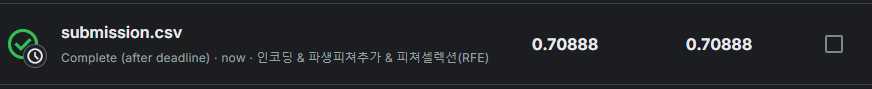

## ÌååÏÉù ÌîºÏ≥ê ÏóÜÏù¥ ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ==============================================================================
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']


# --- 2-2. 'color'(cl) ÌîºÏ≥ê Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])


# --- 2-3. ÌÉÄÍ≤ü Ïª¨Îüº Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'tp' Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§."""
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)


# --- 2-4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\nÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. (Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ï†úÏô∏)")


# ==============================================================================
# 3. Feature Selection (SelectFromModel)
# ==============================================================================
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

print("\nüéØ Feature Selection Îã®Í≥Ñ ÏãúÏûë...")

# ÏûÑÏãú Î™®Îç∏Î°ú Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
selector_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')
selector_model.fit(X_train_final, y_train_final)

# SelectFromModel Ï†ÅÏö© (thresholdÎäî ÌèâÍ∑†Î≥¥Îã§ ÌÅ∞ featureÎßå ÎÇ®ÍπÄ)
selector = SelectFromModel(selector_model, threshold="mean", prefit=True)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ï∂ïÏÜå
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïù¥Î¶Ñ ÌôïÏù∏
selected_features = X_train_final.columns[selector.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïàò: {len(selected_features)} / {X_train_final.shape[1]}")
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî ÌîºÏ≤ò Î™©Î°ù:")
print(list(selected_features))

print("\nFeature Selection ÏôÑÎ£å.")


# ==============================================================================
# 4. Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≤ò ÏÇ¨Ïö©)
# ==============================================================================
final_model = XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train_selected, y_train_final)

print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 6. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

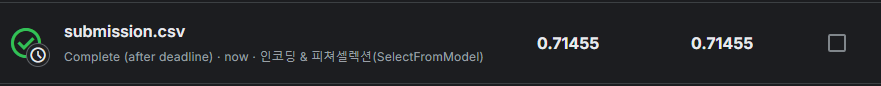

# Í∏∞Î≥∏ Î™®Îç∏Î°ú Ï†êÏàò ÌôïÏù∏

In [ ]:
model_list = [
    XGBClassifier(random_state=8989, use_label_encoder=False, eval_metric='logloss'),
    RandomForestClassifier(random_state=8989),
    LogisticRegression(random_state=8989),
    SVC(random_state=8989, probability=True),
    KNeighborsClassifier()
]

for model in model_list:
    model_name = model.__class__.__name__
    if isinstance(model, Pipeline):
        model_name = model.steps[-1][1].__class__.__name__
    
    print(f"========== Evaluating Model: {model_name} ==========")

    myscore(target='tp', df=dff, model=model)
    print("\n\n")

## Ï§ëÍ∞Ñ Ï†úÏ∂ú (XGBClassifier)

### Ïù∏ÏΩîÎî©

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

# testÏóê ÏóÜÎäî Ïª¨Îüº Ï∂îÍ∞Ä (0ÏúºÎ°ú Ï±ÑÏõÄ)
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

# trainÏóê ÏóÜÎäî Ïª¨ÎüºÎèÑ 0ÏúºÎ°ú ÎßûÏ∂§ (ÏïàÏ†ïÏÑ± ÌôïÎ≥¥)
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

# Ïª¨Îüº ÏàúÏÑú ÏùºÏπò
X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (XGBClassifier)
# ==============================================================================
from xgboost import XGBClassifier

final_model = XGBClassifier(
    random_state=8989,
    use_label_encoder=False,
    eval_metric='logloss'
)

final_model.fit(X_train_final, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

### Ïù∏ÏΩîÎî© & ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Feature Selection (SelectFromModel)
# ==============================================================================
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

print("\nüéØ Feature Selection Îã®Í≥Ñ ÏãúÏûë...")

# 1Ô∏è‚É£ ÏûÑÏãú XGB Î™®Îç∏ ÌïôÏäµ
selector_model = XGBClassifier(
    random_state=8989,
    use_label_encoder=False,
    eval_metric='logloss'
)
selector_model.fit(X_train_final, y_train_final)

# 2Ô∏è‚É£ SelectFromModel Ï†ÅÏö© ‚Äî ÌèâÍ∑† Ïù¥ÏÉÅ Ï§ëÏöîÎèÑÎßå ÏÑ†ÌÉù
selector = SelectFromModel(selector_model, threshold="mean", prefit=True)

# 3Ô∏è‚É£ ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ï∂ïÏÜå
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïù¥Î¶Ñ Ï∂îÏ∂ú
selected_features = X_train_final.columns[selector.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïàò: {len(selected_features)} / {X_train_final.shape[1]}")
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî ÌîºÏ≤ò Î™©Î°ù:")
print(list(selected_features))

print("\nFeature Selection ÏôÑÎ£å.")


# ==============================================================================
# 4. Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Í∏∞Î∞ò XGBClassifier)
# ==============================================================================
final_model = XGBClassifier(
    random_state=8989,
    use_label_encoder=False,
    eval_metric='logloss'
)

final_model.fit(X_train_selected, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 6. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())


## Ï§ëÍ∞Ñ Ï†úÏ∂ú (RandomForestClassifier)

### Ïù∏ÏΩîÎî©

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (RandomForestClassifier)
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(
    random_state=8989,
    n_estimators=200,
    max_depth=None,
    n_jobs=-1
)

final_model.fit(X_train_final, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

### Ïù∏ÏΩîÎî© & ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Feature Selection (SelectFromModel with RandomForest)
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

print("\nüéØ Feature Selection Îã®Í≥Ñ ÏãúÏûë...")

# 1Ô∏è‚É£ ÏûÑÏãú RandomForest Î™®Îç∏ ÌïôÏäµ
selector_model = RandomForestClassifier(
    random_state=8989,
    n_estimators=300,
    max_depth=None,
    n_jobs=-1
)
selector_model.fit(X_train_final, y_train_final)

# 2Ô∏è‚É£ SelectFromModel Ï†ÅÏö© ‚Äî ÌèâÍ∑† Ïù¥ÏÉÅ Ï§ëÏöîÎèÑÎßå ÏÑ†ÌÉù
selector = SelectFromModel(selector_model, threshold="mean", prefit=True)

# 3Ô∏è‚É£ ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ï∂ïÏÜå
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïù¥Î¶Ñ Ï∂îÏ∂ú
selected_features = X_train_final.columns[selector.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïàò: {len(selected_features)} / {X_train_final.shape[1]}")
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî ÌîºÏ≤ò Î™©Î°ù:")
print(list(selected_features))

print("\nFeature Selection ÏôÑÎ£å.")


# ==============================================================================
# 4. Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Í∏∞Î∞ò RandomForest)
# ==============================================================================
final_model = RandomForestClassifier(
    random_state=8989,
    n_estimators=300,
    max_depth=None,
    n_jobs=-1
)

final_model.fit(X_train_selected, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 6. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

## Ï§ëÍ∞Ñ Ï†úÏ∂ú (LogisticRegression)

### Ïù∏ÏΩîÎî©

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (LogisticRegression)
# ==============================================================================
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(
    random_state=8989,
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial'
)

final_model.fit(X_train_final, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_final)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

### Ïù∏ÏΩîÎî© & ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Feature Selection (SelectFromModel with LogisticRegression)
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

print("\nüéØ Feature Selection Îã®Í≥Ñ ÏãúÏûë...")

# Ïä§ÏºÄÏùºÎßÅ(LogisticRegressionÏùÄ Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# 1Ô∏è‚É£ ÏûÑÏãú LogisticRegression Î™®Îç∏ ÌïôÏäµ
selector_model = LogisticRegression(
    random_state=8989,
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial',
    penalty='l2'
)
selector_model.fit(X_train_scaled, y_train_final)

# 2Ô∏è‚É£ SelectFromModel Ï†ÅÏö© ‚Äî ÌèâÍ∑† Ïù¥ÏÉÅ Ï§ëÏöîÎèÑÎßå ÏÑ†ÌÉù
selector = SelectFromModel(selector_model, threshold="mean", prefit=True)

# 3Ô∏è‚É£ ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ï∂ïÏÜå
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïù¥Î¶Ñ Ï∂îÏ∂ú
selected_features = X_train_final.columns[selector.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïàò: {len(selected_features)} / {X_train_final.shape[1]}")
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî ÌîºÏ≤ò Î™©Î°ù:")
print(list(selected_features))

print("\nFeature Selection ÏôÑÎ£å.")


# ==============================================================================
# 4. Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Í∏∞Î∞ò LogisticRegression)
# ==============================================================================
final_model = LogisticRegression(
    random_state=8989,
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial',
    penalty='l2'
)

final_model.fit(X_train_selected, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 6. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

## Ï§ëÍ∞Ñ Ï†úÏ∂ú (SVC)

### Ïù∏ÏΩîÎî©

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (SVC)
# ==============================================================================
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SVMÏùÄ Ïä§ÏºÄÏùºÎßÅÏù¥ Îß§Ïö∞ Ï§ëÏöîÌïòÎØÄÎ°ú Ï†ïÍ∑úÌôî Ï∂îÍ∞Ä
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

final_model = SVC(
    kernel='rbf',      # Í∏∞Î≥∏ RBF Ïª§ÎÑê
    C=1.0,             # Í∑úÏ†ú Í∞ïÎèÑ
    gamma='scale',     # ÏûêÎèô Ïä§ÏºÄÏùº
    probability=True,  # ÌïÑÏöîÏãú ÌôïÎ•† ÏòàÏ∏° Í∞ÄÎä•ÌïòÍ≤å
    random_state=8989
)

final_model.fit(X_train_scaled, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_scaled)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

### Ïù∏ÏΩîÎî© & ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Feature Selection (SelectFromModel with Linear SVC)
# ==============================================================================
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

print("\nüéØ Feature Selection Îã®Í≥Ñ ÏãúÏûë...")

# Ïä§ÏºÄÏùºÎßÅ (SVMÏùÄ Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# 1Ô∏è‚É£ ÏûÑÏãú LinearSVC Î™®Îç∏ ÌïôÏäµ (ÏÑ†Ìòï SVMÎßå feature_importance ÎåÄÏ≤¥ Í∞ÄÎä•)
selector_model = LinearSVC(
    random_state=8989,
    penalty='l2',
    C=1.0,
    max_iter=3000
)
selector_model.fit(X_train_scaled, y_train_final)

# 2Ô∏è‚É£ SelectFromModel Ï†ÅÏö© ‚Äî ÌèâÍ∑† Ïù¥ÏÉÅ Ï§ëÏöîÎèÑÎßå ÏÑ†ÌÉù
selector = SelectFromModel(selector_model, threshold="mean", prefit=True)

# 3Ô∏è‚É£ ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ï∂ïÏÜå
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïù¥Î¶Ñ Ï∂îÏ∂ú
selected_features = X_train_final.columns[selector.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïàò: {len(selected_features)} / {X_train_final.shape[1]}")
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî ÌîºÏ≤ò Î™©Î°ù:")
print(list(selected_features))

print("\nFeature Selection ÏôÑÎ£å.")


# ==============================================================================
# 4. Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Í∏∞Î∞ò SVC)
# ==============================================================================
from sklearn.svm import SVC

final_model = SVC(
    kernel='rbf',       # RBF Ïª§ÎÑê (ÎπÑÏÑ†Ìòï)
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=8989
)

final_model.fit(X_train_selected, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_selected)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 6. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

## Ï§ëÍ∞Ñ Ï†úÏ∂ú (KNeighborsClassifier)

### Ïù∏ÏΩîÎî©

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Î™®Îç∏ ÌïôÏäµ (KNeighborsClassifier)
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# KNNÏùÄ Í±∞Î¶¨ Í∏∞Î∞ò Î™®Îç∏Ïù¥ÎØÄÎ°ú Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

final_model = KNeighborsClassifier(
    n_neighbors=5,   # Í∏∞Î≥∏ k=5
    weights='distance',  # Í∞ÄÍπåÏö¥ Ïù¥ÏõÉÏóê Îçî ÌÅ∞ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨
    n_jobs=-1         # Î≥ëÎ†¨ Ï≤òÎ¶¨
)

final_model.fit(X_train_scaled, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 4. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_scaled)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

### Ïù∏ÏΩîÎî© & ÌîºÏ≥ê ÏÖÄÎ†âÏÖò

In [ ]:
# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú)
# ==============================================================================
train_df_raw = pd.read_csv('../data/train.csv')
test_df_raw = pd.read_csv('../data/test.csv')

# Ï†úÏ∂úÏö© id Ï†ÄÏû•
test_ids = test_df_raw['id']
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")


# ==============================================================================
# 2. Ï†ÑÏ≤òÎ¶¨ (Ïù∏ÏΩîÎî©Îßå Ï†ÅÏö©)
# ==============================================================================
# --- 2-1. id Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ---
train_df = train_df_raw.drop('id', axis=1)
train_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl', 'tp']

test_df = test_df_raw.drop('id', axis=1)
test_df.columns = ['bl', 'rf', 'hl', 'hs', 'cl']

# --- 2-2. color(cl) Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
train_dfe = pd.get_dummies(train_df, columns=['cl'])
test_dfe = pd.get_dummies(test_df, columns=['cl'])

# --- 2-3. ÌÉÄÍ≤ü Ïª¨ÎüºÏùÑ Îß® Îí§Î°ú Ïù¥Îèô ---
def tppop(df):
    if 'tp' in df.columns:
        tp_col = df.pop('tp')
        df['tp'] = tp_col
    return df

train_dfe = tppop(train_dfe)

# --- 2-4. ÌÉÄÍ≤ü Î∂ÑÎ¶¨ Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº ---
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_train_final = le.fit_transform(train_dfe['tp'])
X_train_final = train_dfe.drop(columns=['tp'])
X_test_final = test_dfe.copy()

# train/test Ïª¨Îüº ÏùºÏπò
train_cols = X_train_final.columns
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_final[c] = 0

X_test_final = X_test_final[train_cols]

print("\n‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ïª¨Îüº Ï†ïÎ†¨ ÌÜµÏùº")


# ==============================================================================
# 3. Feature Selection (SelectFromModel with RandomForest)
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

print("\nüéØ Feature Selection Îã®Í≥Ñ ÏãúÏûë...")

# ÏûÑÏãú RandomForest Î™®Îç∏Î°ú Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÌîºÏ≤ò ÏÑ†ÌÉù
selector_model = RandomForestClassifier(
    random_state=8989,
    n_estimators=300,
    max_depth=None,
    n_jobs=-1
)
selector_model.fit(X_train_final, y_train_final)

selector = SelectFromModel(selector_model, threshold="mean", prefit=True)
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

selected_features = X_train_final.columns[selector.get_support()]
print(f"ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïàò: {len(selected_features)} / {X_train_final.shape[1]}")
print("ÏÑ†ÌÉùÎêú Ï£ºÏöî ÌîºÏ≤ò Î™©Î°ù:")
print(list(selected_features))

print("\nFeature Selection ÏôÑÎ£å.")


# ==============================================================================
# 4. Î™®Îç∏ ÌïôÏäµ (ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Í∏∞Î∞ò KNeighborsClassifier)
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

# KNNÏùÄ Í±∞Î¶¨ Í∏∞Î∞òÏù¥ÎØÄÎ°ú Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

final_model = KNeighborsClassifier(
    n_neighbors=5,       # Ïù¥ÏõÉ Í∞úÏàò
    weights='distance',  # Í∞ÄÍπåÏö¥ Ïù¥ÏõÉÏóê Îçî ÎÜíÏùÄ Í∞ÄÏ§ëÏπò
    n_jobs=-1            # Î≥ëÎ†¨ Ï≤òÎ¶¨
)

final_model.fit(X_train_scaled, y_train_final)
print("ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å.")


# ==============================================================================
# 5. ÏòàÏ∏° (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
# ==============================================================================
predictions_numeric = final_model.predict(X_test_scaled)
predictions = le.inverse_transform(predictions_numeric)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏôÑÎ£å.")


# ==============================================================================
# 6. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
# ==============================================================================
submission_df = pd.DataFrame({
    "id": test_ids,
    "type": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("\n‚úÖ submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
print("Ï†úÏ∂ú ÌååÏùº ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(submission_df.head())

## Ï§ëÍ∞Ñ Í≤∞Í≥º Ï†ïÎ¶¨
* LogisticRegression & Ïù∏ÏΩîÎî© & ÌîºÏ≥ê ÏÖÄÎ†âÏÖòÏù¥ 0.74291Î°ú Ï†êÏàò Ï†úÏùº ÎÜíÏùå

### Ï†êÏàò ÌôïÏù∏

### Ï†êÏàò Ï†úÏ∂ú Ï†ïÎ¶¨

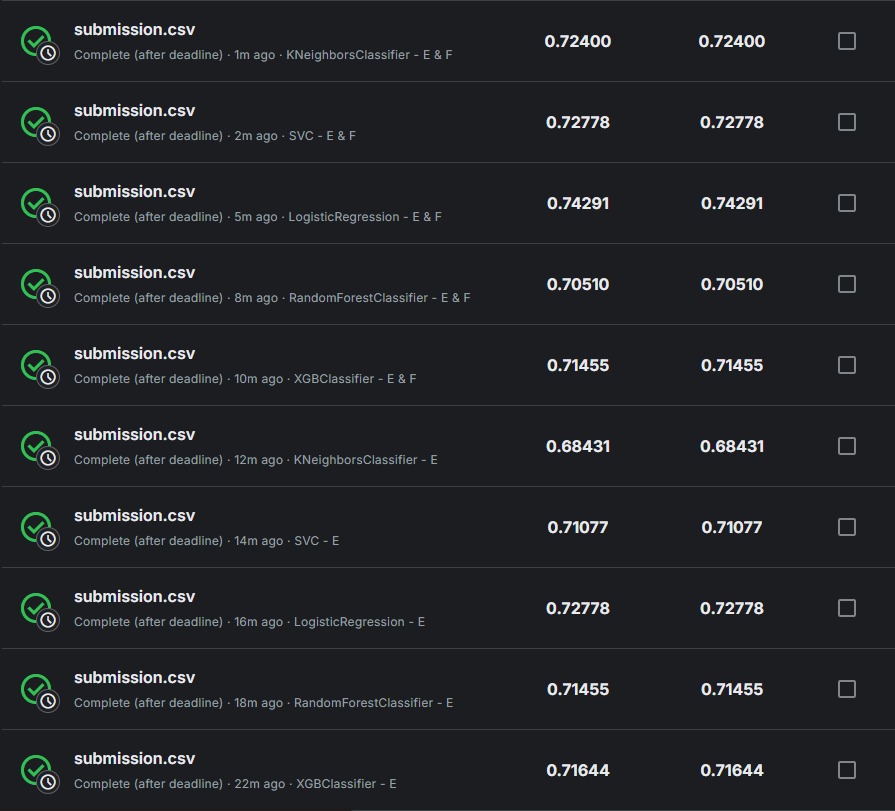

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî

## RandomizedSearchCV

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

## GridSearchCV

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

# ÏïôÏÉÅÎ∏î

## VotingClassifier

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

## BaggingClassifier

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú

## StackingClassifier

### Ï†êÏàò ÌôïÏù∏

### Ï§ëÍ∞Ñ Ï†úÏ∂ú